In [ ]:
import seaborn as sns 
tips = sns.load_dataset('tips')
print('Jumlah baris dan kolom =', tips.shape)
tips.head(3)

Jumlah baris dan kolom = (244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()
import os

In [ ]:
print(type(tips))
r,c=tips.shape
"Jumlah baris=",r,"Jumlah kolom=",c

<class 'pandas.core.frame.DataFrame'>


('Jumlah baris=', 244, 'Jumlah kolom=', 7)

In [ ]:
tips.tail(3)

,total_bill,tip,sex,smoker,day,time,size
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [ ]:
tips.sample(3)

,total_bill,tip,sex,smoker,day,time,size
11,35.26,5.00,Female,No,Sun,Dinner,4
99,12.46,1.50,Male,No,Fri,Dinner,2
82,10.07,1.83,Female,No,Thur,Lunch,1


In [ ]:
tips.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


penjelasan data:
total bill: total tagihan
tip:
sex:jenis kelamin
smoker: merokok atau tidak
day: hari
time: waktu makan 
size: ukuran

In [ ]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

karena tidak ada null, maka tidak ada yang dihapus 

In [ ]:
print(tips.shape)
tips.duplicated().sum()

(244, 7)


1

karena ada data duplikat, maka dihapus

In [ ]:
#menghapus entri yang memiliki data duplikat 
tips.drop_duplicates(inplace=True)
print(tips.duplicated().sum()) # no more duplicates
print(tips.shape) # re-check by printing data size

0
(243, 7)


In [ ]:
print(tips.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


memisahkan var numerik dengan kategorik

memilih hanya var numerik

In [ ]:
tips_num = tips.select_dtypes(include = ['float64', 'int64'])
tips_num.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [ ]:
# Memilih hanya variable kategorik
tips_cat = tips.select_dtypes(include = ['category'])
tips_cat.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


Statistika Deskriptif

In [ ]:
#Statistika Deskriptif
#Pada bagian ini ingin dilihat beberapa ukuran pemusatan dari data yang dimiliki. 
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,243.000000,243.000000,243,243,243,243,243.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.813868,3.002387,NaN,NaN,NaN,NaN,2.572016
std,8.910071,1.385002,NaN,NaN,NaN,NaN,0.952356
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.380000,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.810000,2.920000,NaN,NaN,NaN,NaN,2.000000
75%,24.175000,3.575000,NaN,NaN,NaN,NaN,3.000000


In [ ]:
X = tips.dropna() # jika ada MV minimal satu di salah satu kolom, maka baris di hapus
tips.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
tips.dropna(thresh=2) # jika ada MV minimal di salah 2 kolom, maka baris di hapus
tips.dropna(subset=['total_bill'])[:7] # jika ada MV minimal satu di salah kolom Dist_Hospital
# inplace=True if really really sure
tips.dropna(inplace=True)

In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    category
 3   smoker      243 non-null    category
 4   day         243 non-null    category
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 9.0 KB


Univariate Outlier Detection

In [ ]:
num=tips[['total_bill',	'tip','size']]
num.index = range(243)
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  243 non-null    float64
 1   tip         243 non-null    float64
 2   size        243 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.8 KB


In [ ]:
num.describe()

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


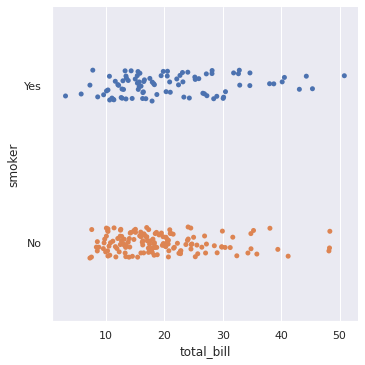

In [ ]:
p= sns.catplot(x="total_bill", y="smoker", data=tips)

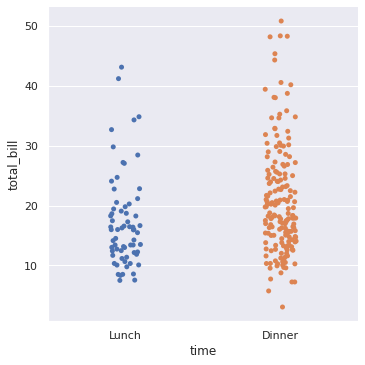

In [ ]:
p= sns.catplot(x="time", y="total_bill", data=tips)

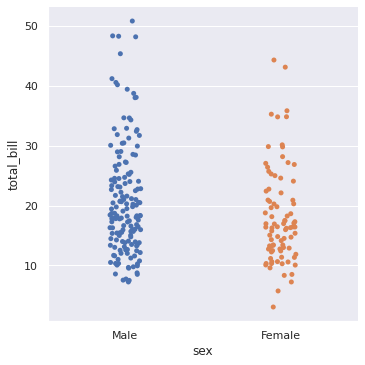

In [ ]:
p= sns.catplot(x="sex", y="total_bill", data=tips)

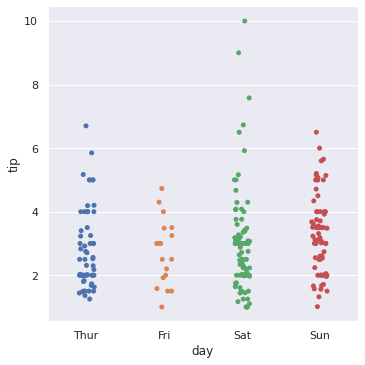

In [ ]:
p= sns.catplot(x="day", y="tip", data=tips)

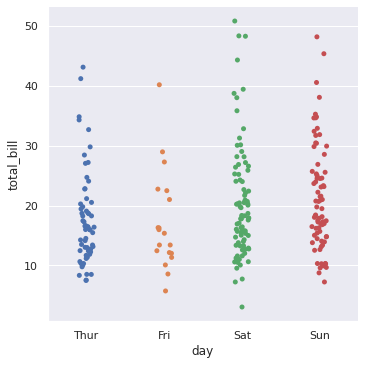

In [ ]:
p= sns.catplot(x="day", y="total_bill", data=tips)

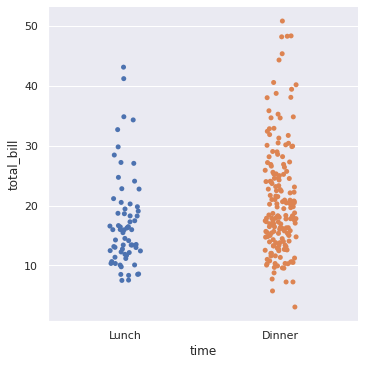

In [ ]:
p= sns.catplot(x="time", y="total_bill", data=tips)

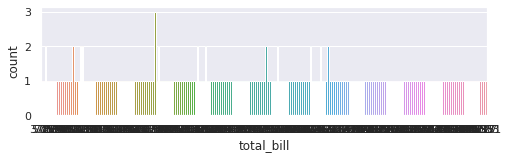

In [ ]:
plt.figure(figsize=(8,2)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(x="total_bill", data=tips)

In [ ]:
def groupedbarplot(df, width=0.8, annotate="values", ax=None, **kw):
    ax = ax or plt.gca()
    n = len(df.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(df.columns, pos):
        bars.append(ax.bar(np.arange(len(df))+x, df[col].values, width=w, **kw))
        # matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
        for val, xi in zip(df[col].values, np.arange(len(df))+x):
            if annotate:
                txt = val if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2), 
                            textcoords="offset points",
                            ha="center", va="bottom")
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df.index)
    return bars

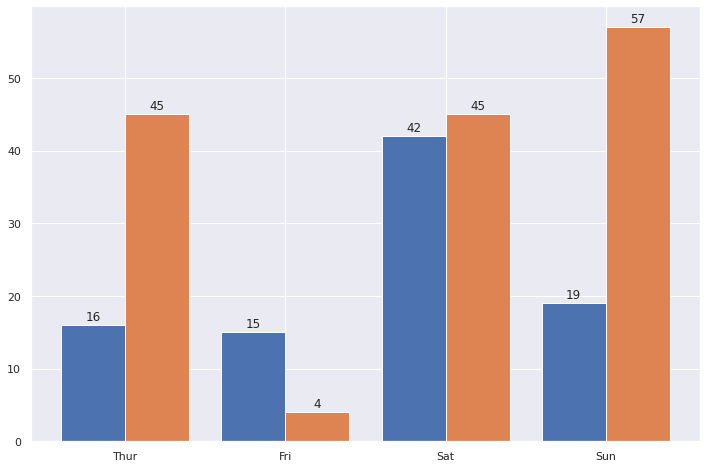

In [ ]:
counts = tips.groupby(["day", "smoker"]).size().unstack()
plt.figure(figsize=(12,8))
groupedbarplot(counts)
plt.show()